### Importing neccesary libraries 

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [221]:
from sklearn.preprocessing import LabelEncoder

Read the dataset from the csv and convert it to dataframe

In [222]:
read_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data = pd.DataFrame(read_data)

In [223]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Analyzing the data

Check for null values in the dataset

In [224]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [225]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [226]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checking each column for unique values which has NaN in the columns and fill the null values with the lowest value counts

In [227]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [228]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [229]:
data['Gender']=data['Gender'].fillna('Female')

In [230]:
data.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [231]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [232]:
data['Married']=data['Married'].fillna('No')

In [233]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [234]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [235]:
data['Dependents'] = data['Dependents'].fillna('3+')

In [236]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [237]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [238]:
data['Self_Employed']=data['Self_Employed'].fillna('Yes')

The NaNs in the numeric dtypes columns are filled with thier mean values

In [240]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [241]:
data.Loan_Amount_Term.nunique()

10

In [242]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [243]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [244]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [245]:
data['Credit_History']= data['Credit_History'].fillna(0.0)

Checking again for null values

In [246]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Got rid of the null values and now we can continue with the analysis

Grouping by different columns to further explore the data 

By Gender

In [247]:
data.groupby(by="Gender").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,654405,143151.000000,16960.236486,43866.0,93.0
Male,2663319,852293.919989,72936.831081,166122.0,382.0


By Loan Status

In [248]:
data.groupby(by="Loan_Status").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,1045647,360539.000000,28981.533784,66048.0,97.0
Y,2272077,634905.919989,60915.533784,143940.0,378.0


By Credit_History

In [249]:
data.groupby(by="Credit_History").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,
0.0,740124,269526.000000,21096.060811,47448.0
1.0,2577600,725918.919989,68801.006757,162540.0


By Married

In [250]:
data.groupby(by="Married").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,,,,,
No,1077313,281181.000000,28039.297297,75822.0,170.0
Yes,2240411,714263.919989,61857.770270,134166.0,305.0


By Education 

In [251]:
data.groupby(by="Education").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,2811568,824387.919989,73834.182432,165420.0,380.0
Not Graduate,506156,171057.000000,16062.885135,44568.0,95.0


By Self_Employed

In [252]:
data.groupby(by="Self_Employed").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,,,,,
No,2524874,790494.919989,70958.418919,171618.0,387.0
Yes,792850,204950.000000,18938.648649,38370.0,88.0


By Property Area

In [253]:
data.groupby(by="Property_Area").sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Property_Area,,,,,
Rural,994181,294551.120001,27219.472973,61836.0,137.0
Semiurban,1233097,354191.000000,33907.060811,80862.0,187.0
Urban,1090446,346702.799988,28770.533784,67290.0,151.0


##### Plotting several plots and graphs for further analysis

Countplots for Loan_status and Gender

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

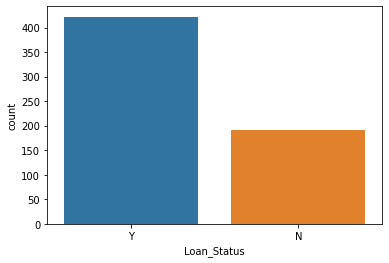

In [254]:
sns.countplot(x=data['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

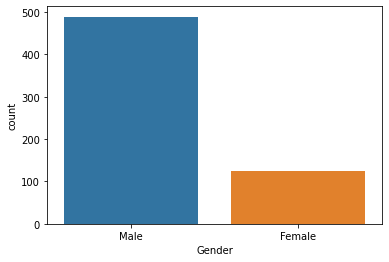

In [255]:
sns.countplot(x=data['Gender'])

Countplots for LoanAmount and Proerty Area

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

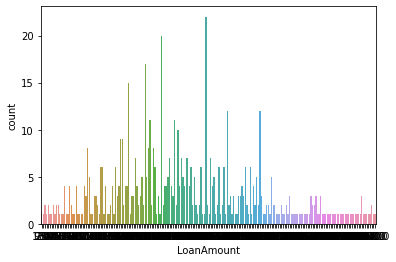

In [256]:
sns.countplot(x=data['LoanAmount'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

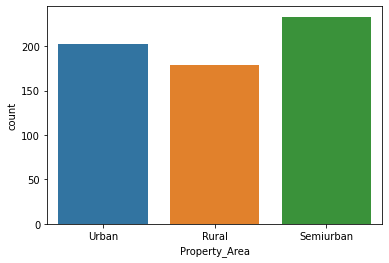

In [257]:
sns.countplot(x=data['Property_Area'])

Scatterplots for Loanamount and ApplicatnIncome

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

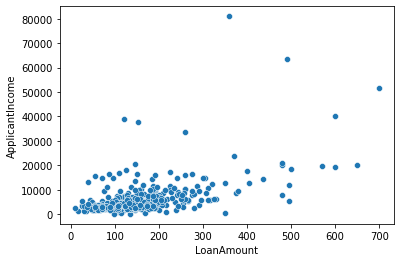

In [258]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=data)

Scatterplot for Loan amount and Applicant Income based on Gender

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

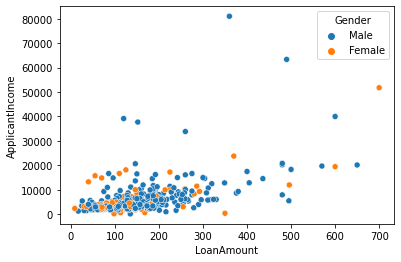

In [259]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=data,hue='Gender')

Barplots for Gender and amount

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

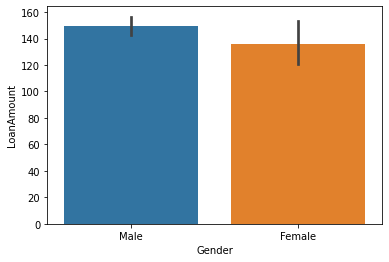

In [260]:
sns.barplot(x='Gender',y='LoanAmount',data=data)

Scatterplot for Loan amount and Gendere based on Loan Status



<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

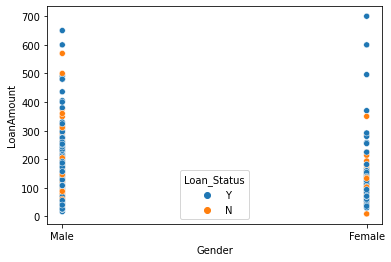

In [261]:
sns.scatterplot(y='LoanAmount',x='Gender',data=data,hue='Loan_Status')

##### Preprocessing Data


Sepreating Categorical and numerical columns for easy processing

In [262]:
categorical = []
numeric = []
types = data.dtypes
for n,c in enumerate(types):
    if c== object:
        categorical.append(data.iloc[:,n])
    else:
        numeric.append(data.iloc[:,n])

Converting to dataframes

In [263]:
cat_df = pd.DataFrame(categorical)
num_df = pd.DataFrame(numeric)

In [264]:
cat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP002959,LP002960,LP002961,LP002964,LP002974,LP002978,LP002979,LP002983,LP002984,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate


In [265]:
num_df.head()

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
ApplicantIncome,5849.000000,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,...,12000.0,2400.000000,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.000000,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.000000,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,146.412162,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,146.412162,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.000000,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.000000,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [266]:
cat_df = cat_df.transpose()
num_df = num_df.transpose()

In [267]:
#catergorical data
cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [268]:
#numeric data
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0


Checking for any null values

In [269]:
cat_df.isnull().any()

Loan_ID          False
Gender           False
Married          False
Dependents       False
Education        False
Self_Employed    False
Property_Area    False
Loan_Status      False
dtype: bool

In [270]:
num_df.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool

Dropping Loan ID column from dataframe as it is not that neccesary for the model

In [271]:
cat_df.drop('Loan_ID',axis=1,inplace=True)

In [272]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


Using Label Encoder for the Categorical Columns

In [273]:
encode = LabelEncoder()

# Transforming the Categorical Columns
for i in cat_df:
    cat_df[i] = encode.fit_transform(cat_df[i])

In [274]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [275]:
#Mapping for credit history
mapping = {  1.0 : 1, 0.0 : 0}
num_df.loc[:, "Credit_History"] = num_df.Credit_History.map(mapping)

In [276]:
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1
1,4583.0,1508.0,128.000000,360.0,1
2,3000.0,0.0,66.000000,360.0,1
3,2583.0,2358.0,120.000000,360.0,1
4,6000.0,0.0,141.000000,360.0,1


Concatenate both dataframes for further operations

In [277]:
df = pd.concat([cat_df,num_df],axis=1)

In [278]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1


Saving the processed data to a csv file for future use

In [328]:
df.to_csv('Processed_Data.csv',index=False)